<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/2023_06_12_Atividade_feita_em_sala_de_aula_(Filtro_de_Eckhardt)_Uvaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade feita em sala de aula (Filtro de Eckhardt

Estação Fluviométrica UVAIA (64444000), localizada na cabeceira do Rio Tibagi.


In [2]:
# bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
# dados de vazão
!gdown 1Aj7Imy5btAd4n4IVgindT8yFlEXqx5zX

Downloading...
From: https://drive.google.com/uc?id=1Aj7Imy5btAd4n4IVgindT8yFlEXqx5zX
To: /content/64444000_vazao.csv
100% 248k/248k [00:00<00:00, 124MB/s]


In [3]:
# Importando os dados em um dataframe
vazao = pd.read_csv('64444000_vazao.csv', index_col=0, sep=',')
vazao.index = pd.to_datetime(vazao.index)
vazao

,q(m3/s)
data,
1979-01-01,33.12
1979-01-02,32.92
1979-01-03,51.41
1979-01-04,75.46
1979-01-05,74.48
...,...
2017-06-26,134.10
2017-06-27,109.00
2017-06-28,82.04


<Axes: xlabel='data'>

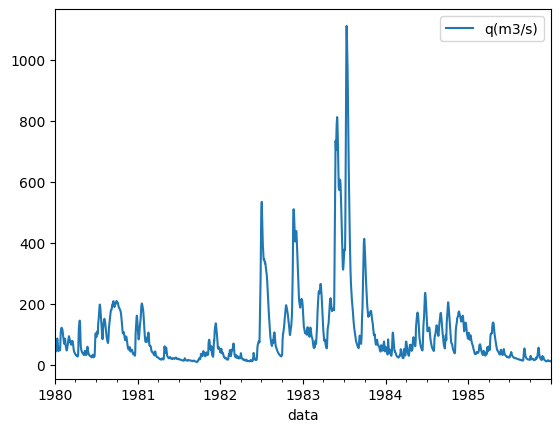

In [5]:
vazao_sel = vazao['1980':'1985']
vazao_sel.plot()

A vazão total $y_i$ no passo de tempo $i$ é dividida em escoamento direto e fluxo de base:

$y_i = f_i + b_i$

* $f_i$: escoamento direto 
* $b_i$: escoamento de base

A vazão de base $b_i$ (Eckhardt, 2005) é obtida por:

$$
b_i=\frac{\left(1-\mathrm{BFI}_{\max }\right) a \, b_{i-1}+(1-a) \, \mathrm{BFI}_{\max } y_i}{1-a \, \mathrm{BFI}_{\max }}
$$

sendo:

A constante da recessão $k$:

$k=\frac{-\Delta t}{\ln \left(\frac{Q_{(t+\Delta t)}}{Q_{(t)}}\right)}$

$a=e^{\frac{-\Delta t}{k}}$

$\mathrm{BFI}_{\max}=0.8344 \frac{Q_{90}}{Q_{50}}+0.2146$

Estimativa do $Q_{90}$ e $Q_{50}$

In [8]:
Q90 = np.percentile(vazao_sel, 10)
Q50 = np.percentile(vazao_sel, 50)
Q90, Q50

(17.88500000000001, 60.78)

In [9]:
BFImax = 0.8344*Q90/Q50 + 0.2146
BFImax

0.4601288581770321

### Cálculo do coeficiente de recessão $k$

Análise de recessão

<Axes: xlabel='data'>

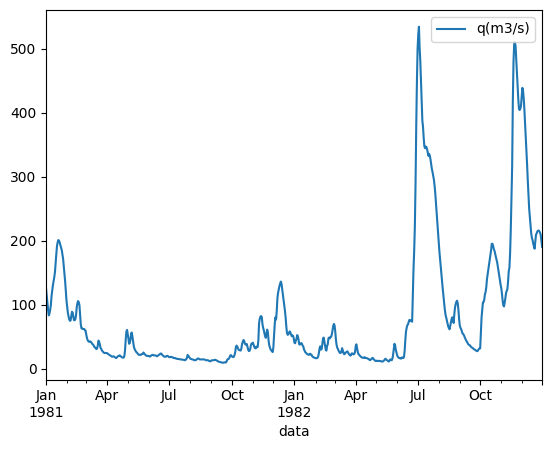

In [10]:
vazao['1981':'1982'].plot()

<Axes: xlabel='data'>

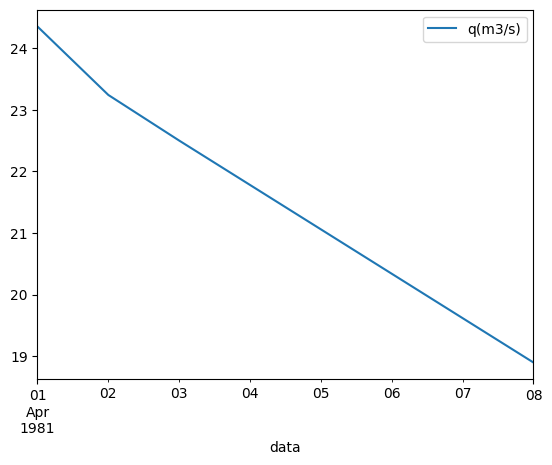

In [38]:
recessao = vazao['1981-04-01':'1981-04-08']
recessao.plot()

<Axes: xlabel='data'>

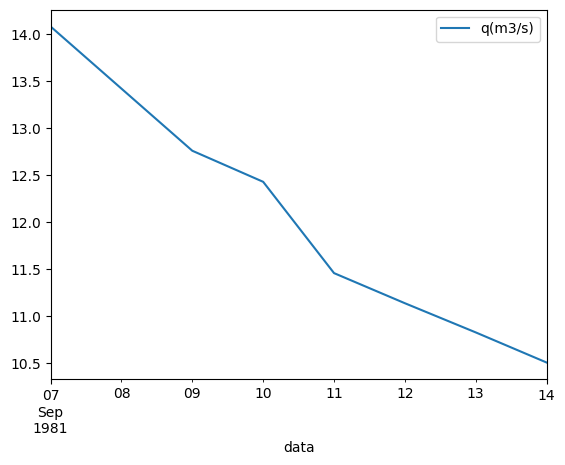

In [14]:
recessao = vazao['1981-09-07':'1981-09-14']
recessao.plot()

In [15]:
recessao

,q(m3/s)
data,
1981-09-07,14.08
1981-09-08,13.42
1981-09-09,12.76
1981-09-10,12.43
1981-09-11,11.46
1981-09-12,11.14
1981-09-13,10.83
1981-09-14,10.51


# Cálculo do coeficiente de recessão $k$

$$
k=\frac{-\Delta t}{\ln \left(\frac{Q_{i+1}}{Q_{i}}\right)}
$$

O $\Delta t$ é 1 dia.

In [17]:
recessao['q(m3/s)(i+1)'] = recessao['q(m3/s)'].shift(-1)
recessao = recessao[:-1]
recessao

<ipython-input-17-3aaa98f58199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recessao['q(m3/s)(i+1)'] = recessao['q(m3/s)'].shift(-1)


,q(m3/s),q(m3/s)(i+1)
data,,
1981-09-07,14.08,13.42
1981-09-08,13.42,12.76
1981-09-09,12.76,12.43
1981-09-10,12.43,11.46
1981-09-11,11.46,11.14
1981-09-12,11.14,10.83
1981-09-13,10.83,10.51


In [18]:
recessao['k'] = -1/np.log(recessao['q(m3/s)(i+1)']/recessao['q(m3/s)'])
recessao

<ipython-input-18-9132767ef6d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recessao['k'] = -1/np.log(recessao['q(m3/s)(i+1)']/recessao['q(m3/s)'])


,q(m3/s),q(m3/s)(i+1),k
data,,,
1981-09-07,14.08,13.42,20.829333
1981-09-08,13.42,12.76,19.829131
1981-09-09,12.76,12.43,38.164483
1981-09-10,12.43,11.46,12.307663
1981-09-11,11.46,11.14,35.310140
1981-09-12,11.14,10.83,35.433132
1981-09-13,10.83,10.51,33.341251


In [20]:
k = recessao['k'].mean()
k

27.887876054579948

In [21]:
k, BFImax

(27.887876054579948, 0.4601288581770321)

In [23]:
vazao_sel['b(m3/s)'] = np.zeros(len(vazao_sel))
vazao_sel['b(m3/s)'][0] = vazao_sel['q(m3/s)'][0]
vazao_sel

<ipython-input-23-9feb4a214e82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'] = np.zeros(len(vazao_sel))
<ipython-input-23-9feb4a214e82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'][0] = vazao_sel['q(m3/s)'][0]


,q(m3/s),b(m3/s)
data,,
1980-01-01,56.25,56.25
1980-01-02,55.80,0.00
1980-01-03,54.02,0.00
1980-01-04,49.64,0.00
1980-01-05,46.20,0.00
...,...,...
1985-12-27,13.09,0.00
1985-12-28,12.76,0.00
1985-12-29,12.10,0.00


In [24]:
a = np.exp(-1/k)
a

0.9647774018139543

## Calculando a vazão de base

$$
b_i=\frac{\left(1-\mathrm{BFI}_{\max }\right) a b_{i-1}+(1-a) \mathrm{BFI}_{\max } y_i}{1-a \mathrm{BFI}_{\max }}
$$


In [28]:
for i in range(1,len(vazao_sel)):
  # vazão de base b(m3/s)
  vazao_sel['b(m3/s)'][i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))

<ipython-input-28-91774bb4c6bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'][i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))


In [29]:
vazao_sel

,q(m3/s),b(m3/s)
data,,
1980-01-01,56.25,56.250000
1980-01-02,55.80,54.313358
1980-01-03,54.02,52.447507
1980-01-04,49.64,49.640000
1980-01-05,46.20,46.200000
...,...,...
1985-12-27,13.09,6.975976
1985-12-28,12.76,6.906001
1985-12-29,12.10,6.821223


<Axes: xlabel='data'>

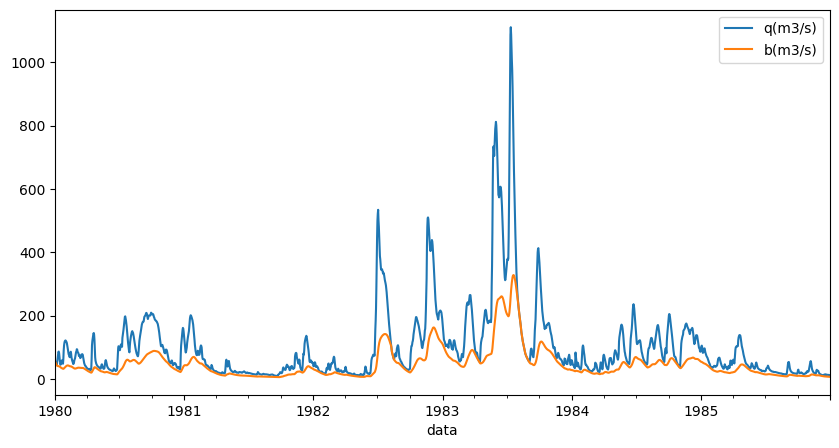

In [31]:
vazao_sel.plot(figsize=(10,5))

In [32]:
BFImax, k, a

(0.4601288581770321, 27.887876054579948, 0.9647774018139543)

<ipython-input-36-677602f7727a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'][i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))


<Axes: xlabel='data'>

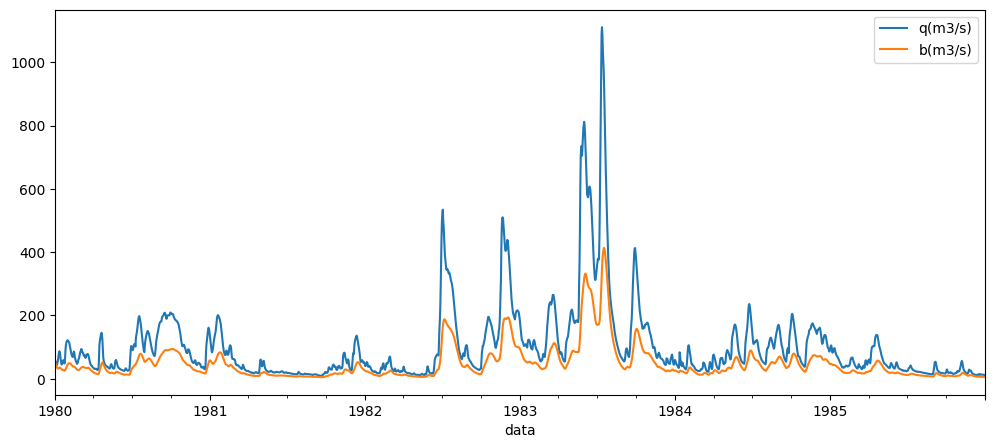

In [36]:
BFImax = 0.4601288581770321
a = 0.9

for i in range(1,len(vazao_sel['b(m3/s)'])):
  # vazão de base b(m3/s) 
  # escolhe o mínimo
  vazao_sel['b(m3/s)'][i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))
vazao_sel.plot(figsize=(12,5))